# Library Setup

In [7]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Data Import and Graph Creation

In [8]:
edges_df = pd.read_csv('../data/gephi-edge-list.csv')
nodes_df = pd.read_csv('../data/gephi-node-list.csv')

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to the 'college_conference' column
nodes_df['encoded_conference'] = le.fit_transform(nodes_df['college_conference'])

# Get the mapping of college conferences to numeric values
conference_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("College Conference Mapping:", conference_mapping)

G = nx.Graph() 

# Add nodes
for _, row in nodes_df.iterrows():
    node_id = row['ID']
    attributes = row.drop('ID').to_dict()
    G.add_node(node_id, **attributes)

# Add the edges
for _, row in edges_df.iterrows():
    source = row['Source']
    target = row['Target']
    edge_attrs = row.drop(['Source', 'Target']).to_dict()
    G.add_edge(source, target, **edge_attrs)    

College Conference Mapping: {'American Athletic Conference': 0, 'Atlantic Coast Conference': 1, 'Big East': 2, 'Big Sky Conference': 3, 'Big South - Ohio Valley Conference': 4, 'Big South Conference': 5, 'Big Ten Conference': 6, 'Big Twelve Conference': 7, 'Canada West Universities Athletic Association': 8, 'Central Intercollegiate Athletic Association': 9, 'Colonial Athletic Association': 10, 'Conference USA': 11, 'Great American Conference': 12, 'Great Lakes Intercollegiate Athletic Conference': 13, 'Great Northwest Athletic Conference': 14, 'Gulf South Conference': 15, 'Independent': 16, 'Ivy League': 17, 'Lone Star Conference': 18, 'Mid-America Intercollegiate Athletic Association': 19, 'Mid-American Conference': 20, 'Mid-Eastern Athletic Conference': 21, 'Mid-South Conference': 22, 'Mid-States Football Association': 23, 'Midwest Conference': 24, 'Minnesota Intercollegiate Athletic Conference': 25, 'Missouri Valley Football Conference': 26, 'Mountain East Conference': 27, 'Mountain

# Basic Statistics
Not sure exactly what direction this has to go at this point in time

Spearman's correlation matrix:
                       degree  encoded_conference  weighted_degree
degree              1.000000           -0.008123         0.893763
encoded_conference -0.008123            1.000000        -0.008873
weighted_degree     0.893763           -0.008873         1.000000


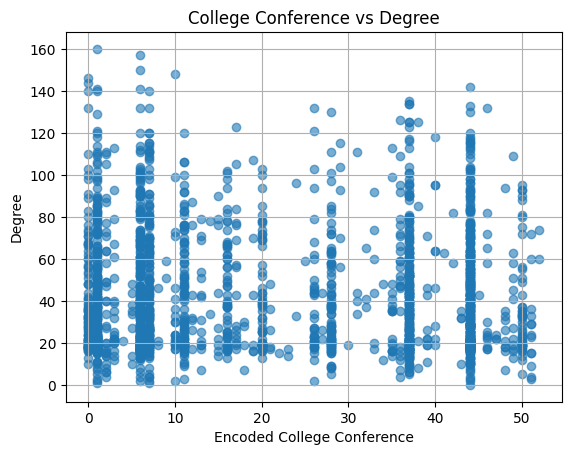

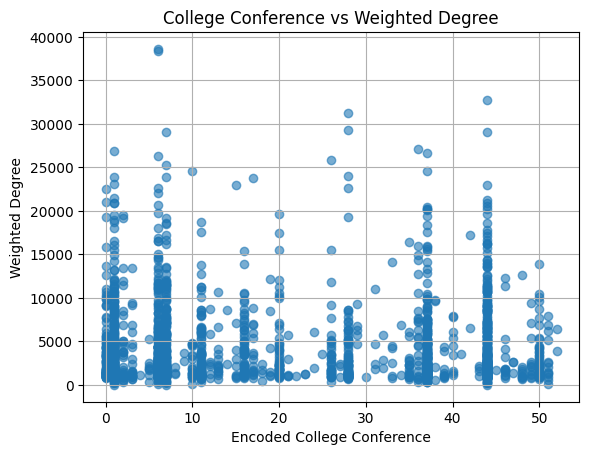

In [9]:
# Get degree and weighted degree
degree_dict = dict(G.degree())
weighted_degree_dict = dict(G.degree(weight='Weight'))

# Create a DataFrame for nodes with degree, weighted degree, and encoded college conference
df = pd.DataFrame({
    'ID': list(degree_dict.keys()),
    'degree': list(degree_dict.values()),
    'weighted_degree': list(weighted_degree_dict.values()),
    'encoded_conference': nodes_df.set_index('ID')['encoded_conference'].values  # Add encoded conference for each node
})

# Compute Spearman's correlation
correlation = df[['degree', 'encoded_conference', 'weighted_degree']].corr(method='spearman')
print("Spearman's correlation matrix:\n", correlation)


# Plot degree vs encoded conference
plt.scatter(df['encoded_conference'], df['degree'], alpha=0.6)
plt.xlabel('Encoded College Conference')
plt.ylabel('Degree')
plt.title('College Conference vs Degree')
plt.grid(True)
plt.show()

# Plot weighted degree vs encoded conference
plt.scatter(df['encoded_conference'], df['weighted_degree'], alpha=0.6)
plt.xlabel('Encoded College Conference')
plt.ylabel('Weighted Degree')
plt.title('College Conference vs Weighted Degree')
plt.grid(True)
plt.show()